# <3주차 MLstudy 강의정리 및 코드실습>

## Lab 07-1, 07-2  Application & Tips

● Learning rate 학습을 위한 값

    ○ Gradient 
    Learning rate(weight)의 값을 조정함으로써 기울기를 조절하여 최적값 찾기

    ○ Good and Bad Learning rate
    Normal Learning Rate는 0.01이다. 이 값이 너무 크거나 너무 작으면 기울기의 최적값을 찾기 어려워진다.
    
    ○ Annealing the learning rate (Dacay)
    학습을 하며 Learning rate값을 조정한다.  
    
    <세가지 방법>
    
    1. Step decay : N epoch or validation loss, epoch 수에 따라 α값 조정
    예시 코드: learning_rate=tf.train.exponential_decay(starter_learing_rate,global_step,1000,0.96,staircase=True)
    
    starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)
    global_step : 현재 학습 횟수
    1000 : 곱할 횟수 정의 (1000번에 마다 적용)
    0.96 : 기존 learning에 곱할 값
    적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
    
    2. Exponential decay
    3. 1/t decay

● Data preprocessing 데이터 전처리

    ○ Standardization/Normanalization 표준화 기법/정규화 기법
    표준화 기법: Xnew = X - X평균 / 표준편차
    정규화 기법: Xnew = X - Xmin / Xmax-Xmin 
    --> 특이한 예외적인 데이터를 고려하지 아니하고 평가할 가치가 있는 데이터만을 0과 1 사이의 값으로 전처리함
    예시 코드: Normalization = (data-np.min(data,0)/(np.max(data,0)-np.min(data,0)

    ○ Noisy Data 쓸모없는 데이터 없애기 => 깔끔한 데이터 => 정확한 모델을 만들 수 있다.
    ex) 자연어 처리에서 주요 단어만 추출, 사진에서 얼굴만 추출


● Overfitting 모델이 데이터에 과하게 맞추어져 있다. High variance (변화량이 많다.)

    모델이 Overfitting 되어 있다면 새로운 data로 학습을 하면 정확도가 떨어지는 불상사가 생긴다. 
    또한 Test data 뿐만 아니라 새로운 data에도 잘 맞추는 것이 중요하다.

    ○ 해결방법1. Set a features
    o 데이타 더 많이 넣기
    o features를 더 줄이기(PCA를 사용하여 차원을 줄여 모델의 특징을 줄인다.) 
    o features를 더 추가하기(특징을 추가하여 모델을 더 정교하게 만든다.)

    ○ 해결방법2. Regularization
    o weight값을 정규화한다.
    θ0=1,θ1=2,θ2=100,θ3=3,θ4=4 라면 θ2의 극단적인 data 값에 의한 overfitting을 방지하기 위해 loss값에 특정값을 준다.
    

In [16]:
import numpy as np # 기본 Library 선언
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.0.0


In [17]:
def normalization(data): #정규화를 위한 함수 0~1 scaling
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

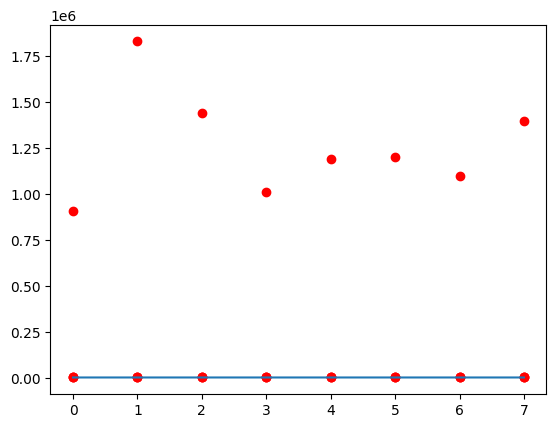

In [18]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
# data 4번째 값까지 X data 5번째 값은 Y data
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


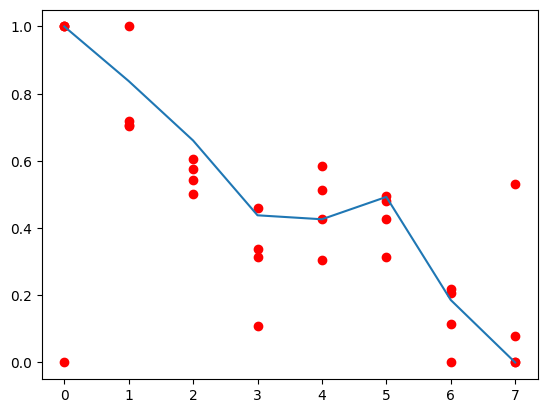

In [19]:
xy = normalization(xy) #데이터 전처리 과정 정규화 기법 사용
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
# size 설정
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [21]:
def linearReg_fn(features): # Linear Regression의 Hyphthesis를 정의한다 (y=Wx+b)
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

In [22]:
def l2_loss(loss, beta = 0.01): # Linear regression with regularization 적용
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

In [23]:
def loss_fn(hypothesis, features, labels, flag = False): 
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

In [24]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):   # dacay 방법 사용 learning rate 값을 step마다 0.96씩 곱함
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

In [25]:
EPOCHS = 101

for step in range(EPOCHS): # 실제 학습 수행
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32) # type 맞추기
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 1.7346
Iter: 10, Loss: 0.0745
Iter: 20, Loss: 0.0438
Iter: 30, Loss: 0.0273
Iter: 40, Loss: 0.0181
Iter: 50, Loss: 0.0128
Iter: 60, Loss: 0.0099
Iter: 70, Loss: 0.0080
Iter: 80, Loss: 0.0068
Iter: 90, Loss: 0.0060
Iter: 100, Loss: 0.0054


# Lab 07-3 Application & Tips_Data & Learning

● Data sets => 머신러닝 모델을 만드는데에 있어서 data의 구성이 중요

    ○ Training 학습을 위한 data / Validation 평가를 위한 data / Testing data
    data set에서 학습시킬 data와 평가할 때 사용할 data를 잘 분류해줘야 한다.
    
    ○ Evaluating a hypothesis 어떻게 모델을 평가하는지
    기존 data와 다른 test data를 통해 검증한다.
    
    ○ Anomaly Detection 이상 감지
    특이 data 검증
    
● Learning

    ○ Online Learning vs Batch Learning
    인터넷 연결 학습(실시간 data) 과 오프라인(고정된 data) 학습의 차이
    
    ○ Fine tuning 모델을 재학습
    Fine-Tuning이란 기존에 학습된 모델을 그대로 사용하지 않고, 
    해당 모델을 설계자의 목적이나 상황에 맞게 아키텍쳐를 변형하여 학습시킴으로서 먼저 학습된 모델을 업데이트하는 방법. 
    모델의 파라미터를 미세하게 조정하는 작업.
    
    ○ Efficient Models 모델 경량화
    1×1 convolutions를 사용하여 차원을 줄임으로써 대용량 data 처리 속도를 높인다.
    
● Sample Data

    ○ 
    Fashion MNIST 의류 data 128개의 layer 10개의 class로 분류
    /
    IMDB 자연어 영화평 분류
    /
    CIFAR-100 100개의 class를 test해볼 수 있음